_Done in class_ Complete the following code to implement the secant method. Write the code to estimate a root of the function $f(x) = \cos(x)$ with initial guesses `x[0]=2.5` and `x[1]=2`, with a tolerance of $10^{-10}$, and maximum number of iterations equal to 32. 

Est. Root: 1.5707963267948966


C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log
C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in log


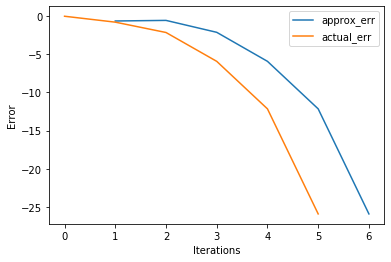

In [20]:
#import necesssary packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# define function that you're finding the root of
def f(x):
    return np.cos(x)
# Actual root of function
act_root = np.pi/2

### INITIALIZATION ##########

#2 initial guesses
guess1 = 2.5
guess2 = 2.0
x = np.array([guess1,guess2]) # [previous,current]
#max number of iterations
iteration = 32
#tolerance
tolerance = 10 ** -10
#Array to hold solutions (initialize with zeros)
solution = np.zeros(iteration)

# first two entries of the array consists of the two initial guesses
solution[0] = x[0]
solution[1] = x[1]
#Arrays to hold approx and actual errors (initialize with zeros)
approx_err = np.zeros(iteration)
actual_err = np.zeros(iteration)

### COMPUTATION #############



temp = 0
est_root_index = 0

approx_err[0] = 0
approx_err[1] = np.abs(solution[1] - solution[0])

actual_err[0] = np.abs(solution[0] - act_root)
actual_err[1] = np.abs(solution[1] - act_root)


# Iterative estimates: two estimates are complete, iterate up to maximum # of iterations
for i in range(2,iteration):
    

    #Compute approximate derivative from secant formula
    # Obtain next root guess   
    temp = x[1]

    x[1] = x[1] - (f(x[1])*(x[1]-x[0]))/(f(x[1]) - f(x[0]))
    solution[i] = x[1]

    x[0] = temp

    # Obtain approximate and actual errors
    actual_err[i] = np.abs(solution[i] - act_root)
    approx_err[i] = np.abs(solution[i] - solution[i-1])
     
    est_root_index = i
    # break from loop if tolerance (based on approx error) is reached
    if(tolerance > approx_err[i]):
        break
    
##output final root estimate
print('Est. Root: {}'.format(solution[est_root_index]))

# Plot the logarithm of the actual and approximate errors
plt.plot(range(iteration),np.log(approx_err),label ='approx_err')
plt.plot(range(iteration),np.log(actual_err),label="actual_err")
# Add labels and titles to the plots
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()

2. Use secant method on the function $f(x) = x + x^2$ with initial guesses `x[0]=-.01` and `x[1] = .01`. Compute 5 additional estimates, for a total of 7 root estimates.  Let `err[0] ... err[6]` be the errors for your 7 estimates. Create two plots: in the first plot, plot the values `0,...,6` on the $x$ axis and `log(abs(err))/log(abs(err[0]))` on the $y$ axis.  In the second plot, plot the values `1,...,6` on the $x$ axis and `abs(err[1:] / abs(err[:-1])`.  See if you can explain the patterns that you see.

Est. Root: -9.805901971639508e-17


C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in log
C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log
C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in true_divide


Text(0, 0.5, 'Error')

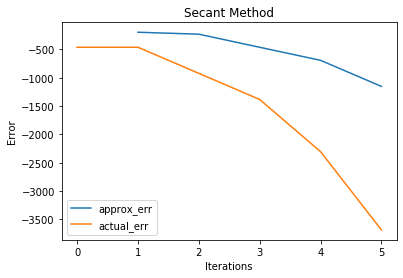

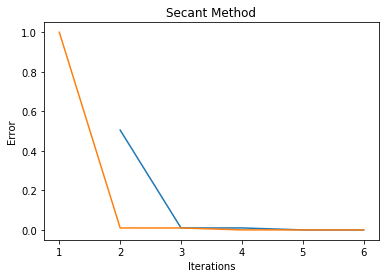

In [61]:
#import necesssary packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# define function that you're finding the root of
def f(x):
    return x**2 + x
# Actual root of function
act_root = 0

### INITIALIZATION ##########

#2 initial guesses
guess1 = -0.01
guess2 = 0.01
x = np.array([guess1,guess2]) # [previous,current]
#max number of iterations
iteration = 7
#tolerance
tolerance = 10 ** -10
#Array to hold solutions (initialize with zeros)
solution = np.zeros(iteration)

# first two entries of the array consists of the two initial guesses
solution[0] = x[0]
solution[1] = x[1]

#Arrays to hold approx and actual errors (initialize with zeros)
approx_err = np.zeros(iteration)
actual_err = np.zeros(iteration)

### COMPUTATION #############

temp = 0
est_root_index = 0

approx_err[0] = 0
approx_err[1] = np.abs(solution[1] - solution[0])

actual_err[0] = np.abs(solution[0] - act_root)
actual_err[1] = np.abs(solution[1] - act_root)


# Iterative estimates: two estimates are complete, iterate up to maximum # of iterations
for i in range(2,iteration):
    

    #Compute approximate derivative from secant formula
    # Obtain next root guess   
    temp = x[1]

    x[1] = x[1] - (f(x[1])*(x[1]-x[0]))/(f(x[1]) - f(x[0]))
    solution[i] = x[1]

    x[0] = temp

    # Obtain approximate and actual errors
    actual_err[i] = np.abs(solution[i] - act_root)
    approx_err[i] = np.abs(solution[i] - solution[i-1])
     
    est_root_index = i
    # break from loop if tolerance (based on approx error) is reached
    if(tolerance > approx_err[i]):
        break
    

##output final root estimate
print('Est. Root: {}'.format(solution[est_root_index]))

#print(approx_err)
#print(actual_err)

plt.figure(1)
# Plot the logarithm of the actual and approximate errors
plt.plot(range(iteration),np.log(approx_err)/np.abs(approx_err[1]),label ='approx_err')
plt.plot(range(iteration),np.log(actual_err)/np.abs(actual_err[0]),label="actual_err")
# Add labels and titles to the plots
plt.title('Secant Method')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()

plt.figure(2)
    
plt.plot(range(1,iteration), abs(approx_err[1:]) / abs(approx_err[:-1]),label ='approx_err')
plt.plot(range(1,iteration), abs(actual_err[1:]) / abs(actual_err[:-1]),label="actual_err") 
plt.title('Secant Method')
plt.xlabel('Iterations')
plt.ylabel('Error')

3. Modify your code from (1) so that it performs the method of false position instead of the secant method.  Compare the convergence with the secant method on the above example, and on the function $f(x) = 10^x - 2$ with initial guesses `x[0]=0` and `x[1] = 1`.

Est. Root: 0.30102997118083014


C:\Users\Luis\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log


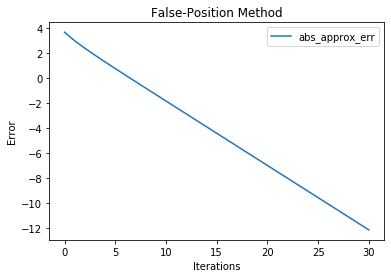

In [58]:
#import necesssary packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# define function that you're finding the root of
def f(x):
    return 10**x - 2
# Actual root of function
act_root = np.log10(2)

### INITIALIZATION ##########

#2 initial guesses
guess1 = 0.0
guess2 = 1.0
x = np.array([guess1,guess2]) # [previous,current]
#max number of iterations
iteration = 32
#tolerance
tolerance = 10 ** -10
#Array to hold solutions (initialize with zeros)
solution = np.zeros(iteration)

# first two entries of the array consists of the two initial guesses
solution[0] = x[0]
solution[1] = x[1]
#Arrays to hold approx and actual errors (initialize with zeros)
abs_approx_err = np.zeros(iteration)

### COMPUTATION #############

# Iterative estimates: two estimates are complete, iterate up to maximum # of iterations
for i in range(iteration-1):
    

    #Compute approximate derivative from secant formula
    # Obtain next root guess   
    #temp = x[1]

    solution[i] = (x[1]*f(x[0]) - x[0]*f(x[1]))/(f(x[0]) - f(x[1]))

    expr = f(x[0]) * f(solution[i])

    if(expr < 0):
        x[0]=x[0]
        x[1]=solution[i]
    elif(expr > 0):
        x[0]=solution[i]
        x[1]=x[1]
    elif(expr == 0):
        break

    solution[i+1] = (x[1]*f(x[0]) - x[0]*f(x[1]))/(f(x[0]) - f(x[1]))


    # Obtain approximate and actual errors
    abs_approx_err[i] = np.abs((solution[i+1] - solution[i])/solution[i+1]) * 100

    est_root_index = i+1

    # break from loop if tolerance (based on approx error) is reached
    if(tolerance > abs_approx_err[i]):
        break
   

    # output final root estimate
print('Est. Root: {}'.format(solution[est_root_index]))

# Plot the logarithm of the actual and approximate errors
plt.plot(range(iteration),np.log(abs_approx_err),label ='abs_approx_err')
# Add labels and titles to the plots
plt.title('False-Position Method')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()


